In [21]:
import sys
sys.path.append('..')
from utils import evaluate_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [22]:
traf_df = pd.read_csv("./data/traffic_accidents.csv")
traf_df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [23]:
traf_target = traf_df["crash_type"] #pulling target out before dropping non-numerics

traf_features = traf_df.drop(columns=["crash_type"])

traf_features = traf_features.dropna(axis=1, how="all") # dropping empty variables col-wise
traf_features = traf_features.dropna(axis=0, how="any") #dropping rows with any missing values

traf_target = traf_target.loc[traf_features.index] #target and remaining rows aligned

traf_features = traf_features.select_dtypes(include=["number"]) #keeping only numeric cols

print(traf_features.info())
print("Features shape:", traf_features.shape)
print("Target shape:", traf_target.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   num_units                      209306 non-null  int64  
 1   injuries_total                 209306 non-null  float64
 2   injuries_fatal                 209306 non-null  float64
 3   injuries_incapacitating        209306 non-null  float64
 4   injuries_non_incapacitating    209306 non-null  float64
 5   injuries_reported_not_evident  209306 non-null  float64
 6   injuries_no_indication         209306 non-null  float64
 7   crash_hour                     209306 non-null  int64  
 8   crash_day_of_week              209306 non-null  int64  
 9   crash_month                    209306 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 16.0 MB
None
Features shape: (209306, 10)
Target shape: (209306,)


In [24]:
# train/test splitting
traf_features_train, traf_features_test, traf_target_train, traf_target_test = train_test_split(
    traf_features,
    traf_target,
    test_size=0.3,        #.7 train, .3 test
    random_state=42,      
    stratify=traf_target       # keeps class proportions similar in train and test
)

print(traf_features_train.shape, traf_features_test.shape)
print(traf_target_train.shape, traf_target_test.shape)

(146514, 10) (62792, 10)
(146514,) (62792,)


In [25]:
# Dictionary to store all traffic results
traf_results = {}

traf_naive_bayes = GaussianNB()
acc, prec, rec, preds = evaluate_model(
    "Naive Bayes (Traffic)",
    traf_naive_bayes,
    traf_features_train,
    traf_target_train,
    traf_features_test,
    traf_target_test
)
traf_results['Naive Bayes'] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'predictions': preds}

traf_logistic_regression = LogisticRegression(max_iter=1000)
acc, prec, rec, preds = evaluate_model(
    "Logistic Regression (Traffic)",
    traf_logistic_regression,
    traf_features_train,
    traf_target_train,
    traf_features_test,
    traf_target_test
)
traf_results['Logistic Regression'] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'predictions': preds}

traf_knn = KNeighborsClassifier(n_neighbors=5)
acc, prec, rec, preds = evaluate_model(
    "KNN (Traffic, k=5)",
    traf_knn,
    traf_features_train,
    traf_target_train,
    traf_features_test,
    traf_target_test
)
traf_results['KNN'] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'predictions': preds}

traf_decision_tree = DecisionTreeClassifier(random_state=42)
acc, prec, rec, preds = evaluate_model(
    "Decision Tree (Traffic)",
    traf_decision_tree,
    traf_features_train,
    traf_target_train,
    traf_features_test,
    traf_target_test
)
traf_results['Decision Tree'] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'predictions': preds}

traf_mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42)
acc, prec, rec, preds = evaluate_model(
    "MLP (Traffic, 50 hidden units)",
    traf_mlp,
    traf_features_train,
    traf_target_train,
    traf_features_test,
    traf_target_test
)
traf_results['MLP'] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'predictions': preds}

--- Naive Bayes (Traffic) ---
Accuracy : 0.8213
Precision: 0.8638
Recall   : 0.8213

--- Logistic Regression (Traffic) ---
Accuracy : 0.8212
Precision: 0.8636
Recall   : 0.8212

--- Logistic Regression (Traffic) ---
Accuracy : 0.8212
Precision: 0.8636
Recall   : 0.8212

--- KNN (Traffic, k=5) ---
Accuracy : 0.7963
Precision: 0.8052
Recall   : 0.7963

--- KNN (Traffic, k=5) ---
Accuracy : 0.7963
Precision: 0.8052
Recall   : 0.7963

--- Decision Tree (Traffic) ---
Accuracy : 0.8106
Precision: 0.8201
Recall   : 0.8106

--- Decision Tree (Traffic) ---
Accuracy : 0.8106
Precision: 0.8201
Recall   : 0.8106

--- MLP (Traffic, 50 hidden units) ---
Accuracy : 0.8279
Precision: 0.8535
Recall   : 0.8279

--- MLP (Traffic, 50 hidden units) ---
Accuracy : 0.8279
Precision: 0.8535
Recall   : 0.8279



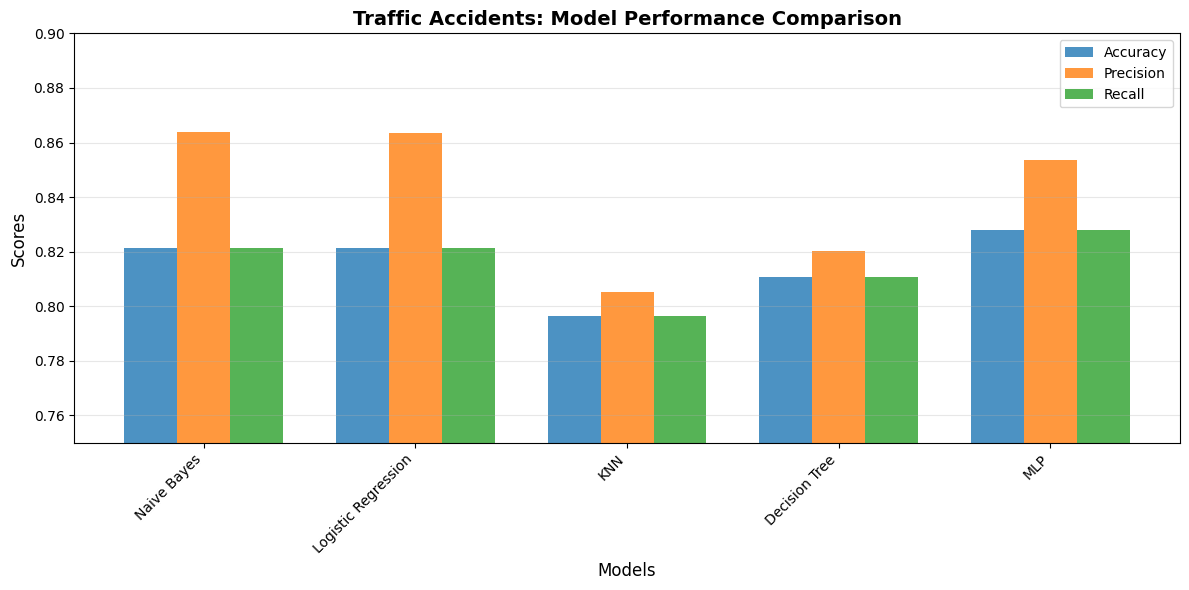

In [26]:
# Performance comparison for Traffic Accidents dataset
models = list(traf_results.keys())
accuracy_scores = [traf_results[m]['accuracy'] for m in models]
precision_scores = [traf_results[m]['precision'] for m in models]
recall_scores = [traf_results[m]['recall'] for m in models]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width, accuracy_scores, width, label='Accuracy', alpha=0.8)
bars2 = ax.bar(x, precision_scores, width, label='Precision', alpha=0.8)
bars3 = ax.bar(x + width, recall_scores, width, label='Recall', alpha=0.8)

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Traffic Accidents: Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()
ax.set_ylim([0.75, 0.90])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('charts/traffic_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

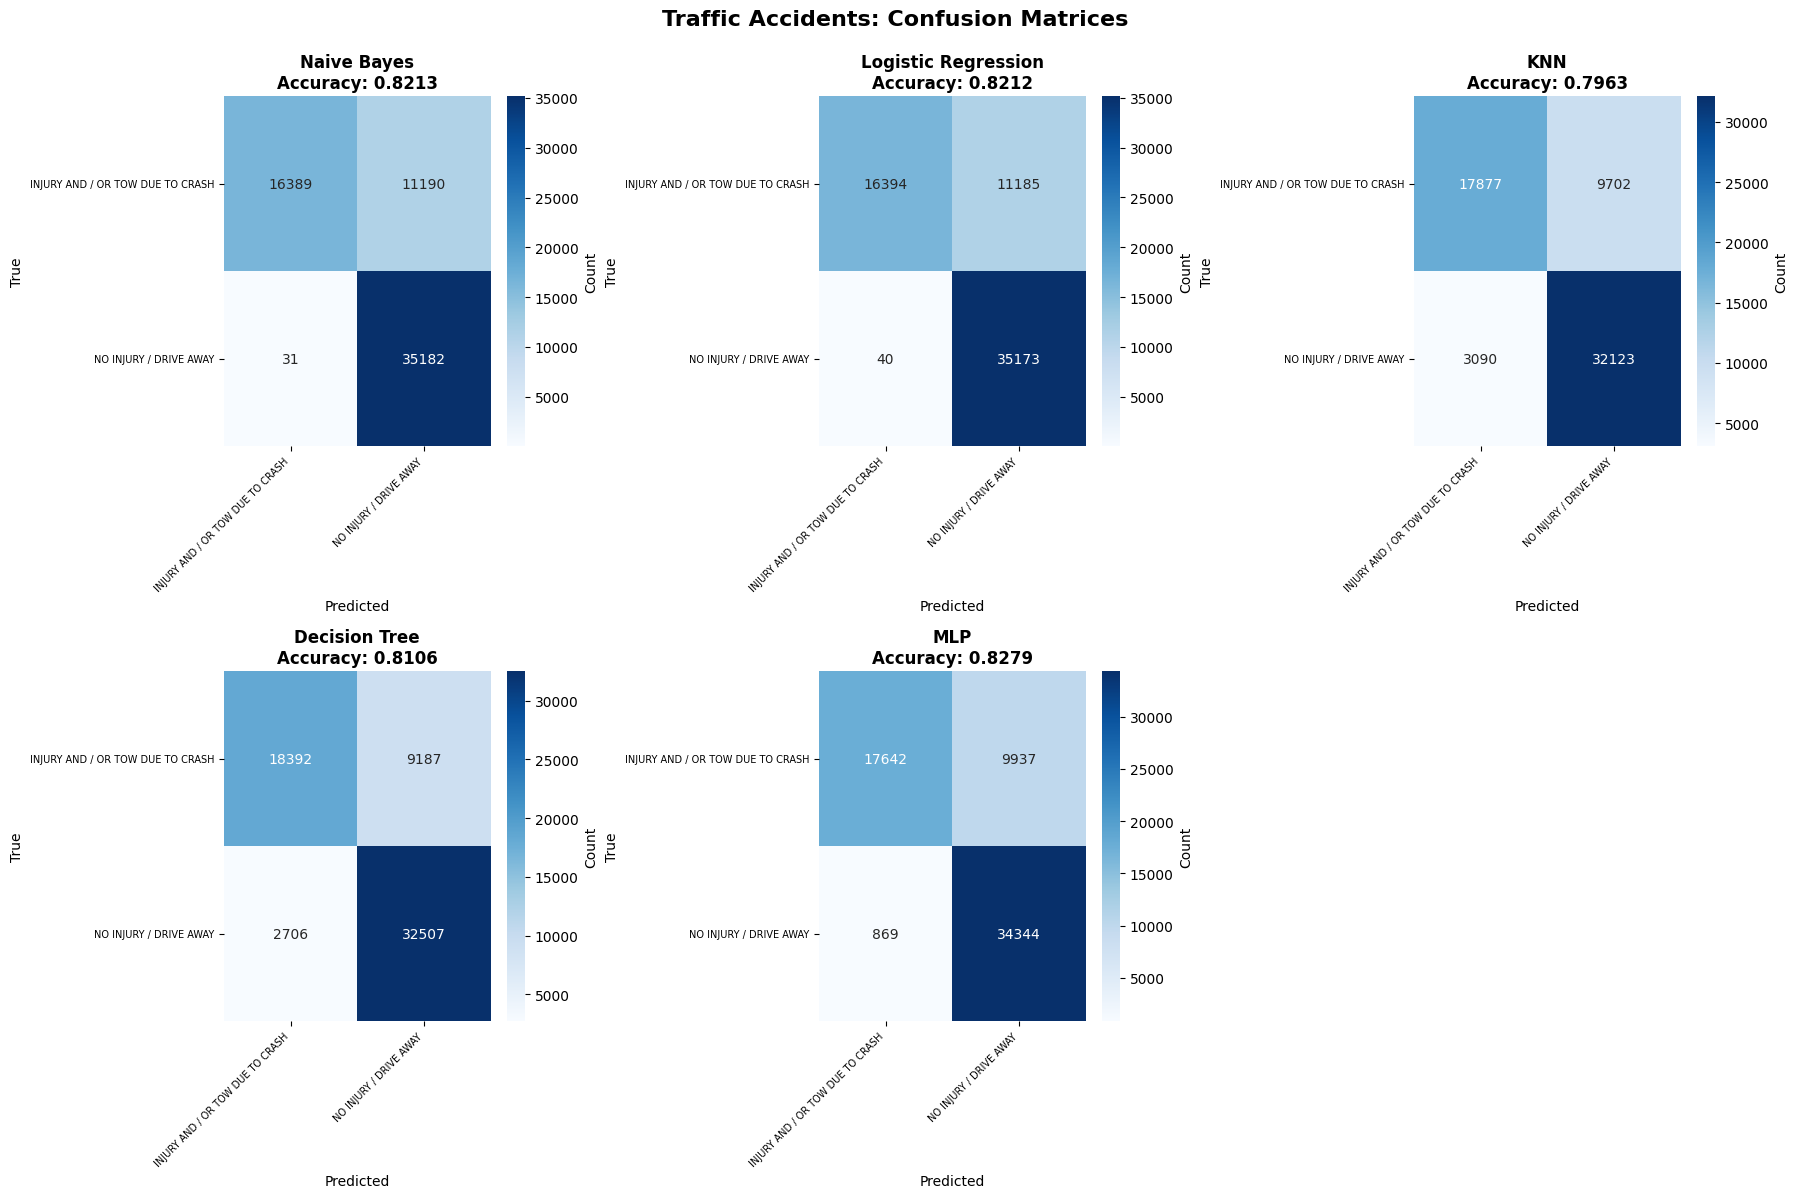

In [27]:
# Confusion Matrices for Traffic Accidents dataset
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (model_name, results) in enumerate(traf_results.items()):
    cm = confusion_matrix(traf_target_test, results['predictions'])
    
    # Get unique class labels
    class_labels = sorted(traf_target_test.unique())
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx], 
                cbar_kws={'label': 'Count'},
                xticklabels=class_labels,
                yticklabels=class_labels)
    axes[idx].set_title(f'{model_name}\nAccuracy: {results["accuracy"]:.4f}', 
                        fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Predicted', fontsize=10)
    axes[idx].set_ylabel('True', fontsize=10)
    axes[idx].tick_params(labelsize=7)
    
    # Rotate x-axis labels for readability
    for tick in axes[idx].get_xticklabels():
        tick.set_rotation(45)
        tick.set_ha('right')

# Hide the extra subplot
axes[5].axis('off')

plt.suptitle('Traffic Accidents: Confusion Matrices', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('charts/traffic_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()